# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Volumen máximo**. Considere un cono circular recto inscrito en una esfera de radio $r$:

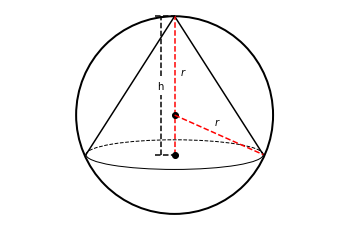

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (14 puntos)
2. Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$. (10 puntos)
3. ¿Cuál es el volumen máximo del cono? (10 puntos)

La fórmula del Volumen es:

$$
V = \frac{1}{3}\pi r^2h
$$
Realicé un corte trasnversal de la figura.

Utilicé el teorema de la altura y considerando que mi radio es $r = 2$ y por lo tanto mi diámetro =$4$

Se forma un triángulo rectángulo que a su vez se divide en 2 triángulos rectángulos.

La altura de mi triángulo cuadrado se define como: la altura al cuadrado es = al producto de sus proyecciones y me quedaría de la siguiente manera:

$$
d^2 = h(4-h)
$$
$$
d^2 = 4h-h^2
$$
$$
d = \sqrt(4h-h^2)
$$

Esta altura me representa el radio de la base del cono, por lo tanto:

$$
r = \sqrt(4h-h^2)
$$

Sustituyendo en la función del volumen:
$$
V = \frac{1}{3} \pi (\sqrt(4h-h^2))^2h
$$

Eliminando el radical y el cuadrado

$$
V = \frac{1}{3} \pi (4h-h^2)h
$$

Aplicando la propieda distributiva, obtenemos:

$$
V = \frac{1}{3} \pi (4h^2-h^3)
$$

Por lo tanto mi función a maximizar es:

$$
max V = \frac{1}{3} \pi (4h^2-h^3) 
$$

In [1]:
#Importar librerías
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [118]:
sym.var('h')
def V(h):
    return (sym.pi*(4*h**2-h**3))/3
V(h)

pi*(-h**3 + 4*h**2)/3

In [119]:
dV=sym.diff(V(h),h)
pc=sym.solve(dV,h)
pc

[0, 8/3]

In [124]:
ddV=sym.diff(dV,h)
ddV

pi*(8 - 6*h)/3

In [125]:
ddV.subs(h,pc[1])

-8*pi/3

Como es $<0$ se comprueba que es un máximo relativo

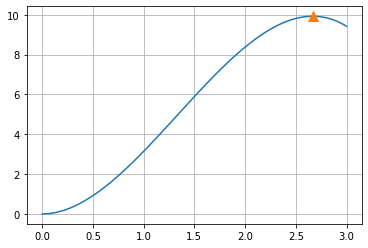

In [126]:
# Gráfica
xn=np.linspace(0,3,100)
y=V(xn)
plt.plot(xn,y)
plt.plot(pc[1],V(pc[1]),'^',ms=10)
plt.grid()

In [129]:
pc[1]

8/3

In [128]:
V(pc[1])

256*pi/81

---
El volumen máximo del cono es:

$ 256\pi / 81 $

La altura que maximiza este volumen del cono es :

$8/3$

---
# Segundo punto. Programación lineal (34 puntos)

Una compañia de aceros produce dos tamaños de tubos: A, B que son vendidos, respectivamente en 10u.m. y 9u.m. por metro. Para fabricar cada metro del tubo A se requieren 0.5 minutos de tiempo de procesamiento sobre un tipo particular de maquina de modelado y cada metro del tubo B requiere 0.6 minutos. Después de la producción, cada metro de tubo, sin importar el tipo requiere 1 onza de material de soldar. El costo total se estima en 3u.m. y 4u.m. por metro de los tubos respectivamente. Para la siguiente semana, la compañía ha recibido pedidos excepcionalmente grandes que totalizan 2000 metros del tubo A y 5000 metros del tubo B. como solo se dispone de 30 horas de tiempo de maquina esta semana y solo se tienen en inventario 3500 onzas de material de soldar, el departamento de producción no podrá satisfacer esta demanda. Como no se espera que continúe esta demanda tan alta, la gerencia esta considerando la compra de algunos de estos tubos a proveedores de Japón a un costo de entrega de 6u.m. por metro del tubo A y 7u.m. por metro del tubo B.

Se desea conocer la cantidad de producción de cada tipo de tubo y la cantidad de compra a Japón para satisfacer la demanda y **maximizar** las ganancias de la compañía (esto es, precio de venta menos costos). La siguiente tabla presenta la información correspondiente.

<table>
  <tr>
      <th>Tubo</th>
      <th>Precio de venta</th>
      <th>Demanda</th>
      <th>Tiempo de máquina</th>
      <th>Material para soldar</th>
      <th>Costo de producción</th>
      <th>Costo de compra</th>
  </tr>
  <tr>
      <th>Tipo A</th>
      <td>10</td>
      <td>2000</td>
      <td>0.5 min</td>
      <td>1 oz/m</td>
      <td>3</td>
      <td>6</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Tipo B</th>
      <td>9</td>
      <td>5000</td>
      <td>0.6 min</td>
      <td>1 oz/m</td>
      <td>4</td>
      <td>7</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td></td>
      <td></td>
      <td>30 horas</td>
      <td>3500 oz</td>
      <td></td>
      <td></td>
  </tr>
</table>

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(24 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos tubos de cada tipo se deben producir?, ¿Cuántos se deben comprar?, ¿Cuál es la ganancia? (10 puntos)

---
**Definición de variables**

$x_a$ = Metros del tubo A a producir

$y_a$ = Metros del tubo A a comprar

$x_b$ = Metros del tubo B a producir

$y_b$ = Metros del tubo B a comprar

**Restricciones**

$0.5x_a + 0.6x_b\leq1800$ (Tiempo con el que se dispone en minutos)

$x_a + x_b \leq3500$ (Material para soldar con el que se cuenta)

$x_a + y_a = 2000$ (Metros requeridos del tubo A)

$x_b + y_b = 5000$ (Metros requeridos del tubo B)

**Función a maximizar**

Se busca maximizar la ganancia considerando la que se obtiene de los tubos producidos y de los comprados (precio de venta menos costos)

$max 7x_a+5x_b+4y_a+2y_b$

**Función a minimizar**

Se busca minimizar el costo de la compra a Japón

$min 6y_a+7y_b$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as opt

In [23]:
c=-np.array([7,5,4,2]) #Coeficientes de la función objetivo
Aub=np.array([[0.5,0,0.6,0], #Restrcción tiempo que se dispone             
              [1,0,1,0]]) #Restricción del material para soldar
bub=np.array([1800,3500]) #Coeficientes de los límites de las restricciones
Aeq=([[1,1,0,0],[0,0,1,1]]) #coeficientes de la igualdad
beq=([2000,5000]) #coeficiente de la igualdad
opt.linprog(c,Aub,bub,Aeq,beq,method='simplex')

     con: array([0., 0.])
     fun: -26666.666666666664
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([  0.        , 166.66666667])
  status: 0
 success: True
       x: array([2000.        ,    0.        , 1333.33333333, 3666.66666667])

---
Se obtiene un beneficio de $26,666.67 u.m$ de la siguiente manera:

* Producir $2000$ metros del tubo A

* No comprar metros del tubo A a Japón

* Producir $1333$ metros del tubo B

* Comprar $3667$ metros del tubo B a Japón

---
# Tercer punto. Ajuste de curvas (32 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en cientos de miles entre los años 1988 y 2001.

In [6]:
y = np.array([5.946,6.430,7.255,8.804,9.725,9.187,8.453,8.581,
              10.421,13.170,14.295,13.920,12.770,13.866])
x = np.arange(8,22)

1. Ajuste las bancarrotas con polinomios de grado 1, 3 y 5. Muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (22 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predecirlo para el año 2011. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

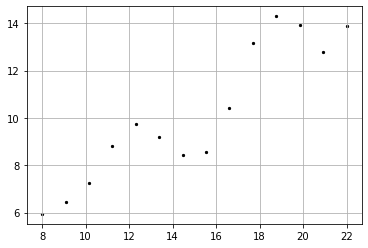

In [7]:
x=np.linspace(8,22,14)
y=y
plt.scatter(x,y,c='k',s=5)
plt.grid()

In [8]:
def f(beta,x,n):
    X=[x**i for i in range(n+1)]
    return np.dot(beta,X)

In [9]:
#Criterio de optimización (mínimos cuadrados)
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [10]:
#Polinomio de grado 1
n=1
beta0=np.random.rand(n+1)
sol1=opt.minimize(fun,beta0,args=(x,y,n))

#Polinomio de grado 3
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(fun,beta0,args=(x,y,n))

#Polinomio de grado 5
n=5
beta0=np.random.rand(n+1)
sol5=opt.minimize(fun,beta0,args=(x,y,n))


In [11]:
sol1

      fun: 15.567476281319319
 hess_inv: array([[ 0.99624249, -0.06129407],
       [-0.06129407,  0.0039176 ]])
      jac: array([-3.93390656e-06,  6.67572021e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([1.25744831, 0.59627963])

In [12]:
sol3

      fun: 15.201269757310458
 hess_inv: array([[ 6.54317519e-04,  3.72770566e-05,  2.19888235e-05,
        -1.16943887e-06],
       [ 3.72770566e-05,  3.76091869e-05, -3.38978133e-05,
         1.77454450e-06],
       [ 2.19888235e-05, -3.38978133e-05,  3.55584308e-05,
        -1.86292027e-06],
       [-1.16943887e-06,  1.77454450e-06, -1.86292027e-06,
         9.87390905e-08]])
      jac: array([-2.38418579e-07, -3.57627869e-07, -2.02655792e-06, -6.73532486e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 16
     njev: 54
   status: 2
  success: False
        x: array([ 8.83686547e+00, -1.09660737e+00,  1.18721513e-01, -2.63691537e-03])

In [13]:
sol5

      fun: 154.5903530207733
 hess_inv: array([[ 1.01680681e+00,  5.28225459e-02, -6.77398282e-02,
         8.81028957e-03, -4.32684257e-04,  7.41144518e-06],
       [ 5.28225459e-02,  1.15422972e+00, -3.29514505e-01,
         3.41720232e-02, -1.52969060e-03,  2.49675750e-05],
       [-6.77398282e-02, -3.29514505e-01,  1.00845387e-01,
        -1.09102842e-02,  5.03637693e-04, -8.41344331e-06],
       [ 8.81028957e-03,  3.41720232e-02, -1.09102842e-02,
         1.21509315e-03, -5.73285812e-05,  9.73874367e-07],
       [-4.32684257e-04, -1.52969060e-03,  5.03637693e-04,
        -5.73285812e-05,  2.75010013e-06, -4.73226758e-08],
       [ 7.41144518e-06,  2.49675750e-05, -8.41344331e-06,
         9.73874367e-07, -4.73226758e-08,  8.22558150e-10]])
      jac: array([-5.00881195e-01, -7.11760330e+00,  1.50926506e+02,  7.69395681e+03,
        1.83343025e+05,  3.59382962e+06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 467
      nit: 6
     njev: 65


In [15]:
sol=[0,0,0,0,0] 
for i in range(5):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

In [16]:
sol[0].fun,sol[2].fun,sol[4].fun

(15.56747628131877, 15.201269778931835, 46.548748491247466)

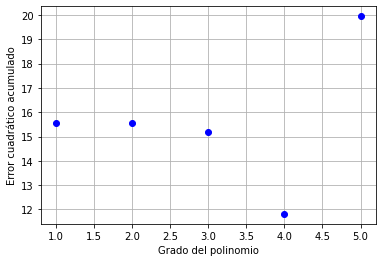

In [21]:
#Error cuadrático acumulado

for i in range(5):
    plt.plot(i+1,sol[i].fun,'ob')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [22]:
for i in range(5):
    print(sol[i].x)

[1.25744906 0.59627958]
[1.26988569e+00 5.94469871e-01 6.03212054e-05]
[ 8.83686839e+00 -1.09660804e+00  1.18721560e-01 -2.63691640e-03]
[-1.36009703e+02  4.28119190e+01 -4.65620838e+00  2.18830123e-01
 -3.71190201e-03]
[ 8.14196953e-01  9.63917231e-01  8.03724964e-02 -2.99558279e-02
  2.33685095e-03 -5.37556442e-05]


Se puede concluir que el polinomio de grado 3 tiene un menor error de ajuste

---
Gráfico con los 3 polinomios

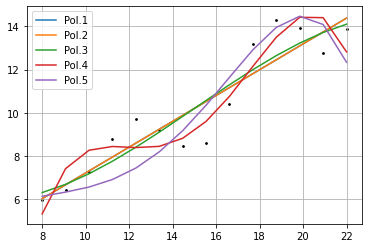

In [23]:
plt.scatter(x,y,s=3,c='k')
for i in range(5):
    plt.plot(x,f(sol[i].x,x,i+1),label='Pol.'+str(i+1))
plt.legend(loc='best')
plt.grid()

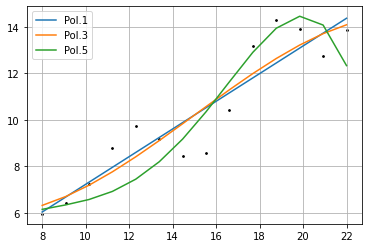

In [24]:
plt.scatter(x,y,s=3,c='k')
plt.plot(x,f(sol[0].x,x,1),label='Pol.'+str(1))
plt.plot(x,f(sol[2].x,x,3),label='Pol.'+str(3))
plt.plot(x,f(sol[4].x,x,5),label='Pol.'+str(5))
plt.legend(loc='best')
plt.grid()

---
Gráfico del polinomio 3 que fue el que mejor se ajusta

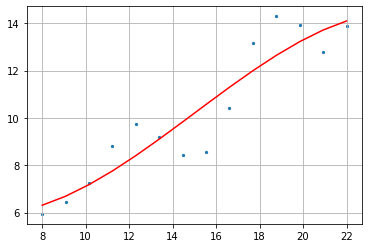

In [144]:
plt.scatter(x,y,s=5)
f= sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f,'r')
plt.grid()

---
Número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predicción para el año 2011. 


In [17]:
a=1998.5-1988
for i in range(5):
    print(f(sol[i].x,a,i+1))

7.518384678264275
7.518469886107784
7.358975782880689
8.076822149661439
7.227022968179995


Utilizando este modelo podemos ver la estimación de bancarrotas a mediados de 1998 con los polinomios 1 a 5, considerando únicamente los polinomios 1, 3 y 5 basándonos en que el 3 es el de menor error, dice que hay 7.35 bancarrotas, y comparándola con las bancarrotas de 1998 (14.295) y las de 1999(13.920) si hay mucha diferencia.

In [19]:
a=2011-1988
for i in range(5):
    print(f(sol[i].x,a,i+1))

14.971879445294235
14.974603272344773
14.335226698448622
10.798505137726352
4.155347660700045


Utilizando este modelo podemos ver la predicción de bancarrotas en el 2011 con los polinomios 1 a 5, y considerando únicamente el 1,3 y 5; basándonos que el de grado 3 es el que tiene menos error, hay una predicción de 14.33 bancarrotas

---
¿Qué diferencias encuentro en cuanto a la interpolación y la extrapolación?

En la interpolación damos un valor de un dato dentro del rango de los datos conocidos, mientras que en la extrapolación, damos un valor que se sale del rango de los datos conocidos.
